# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samro\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")


In [38]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [39]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [40]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='Bitcoin', language='en')
btc_en_df = create_df(btc_news["articles"], "en")



In [41]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='Ethereum', language='en')
eth_en_df = create_df(eth_news["articles"], "en")




In [42]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


# Sentiment scores dictionaries
def sentiment_data(data):
    title_name = {
        "Compound": [],
        "Negative": [],
        "Neutral": [],
        "Positive": [],
        "title_sent": [],
    }
    text_sent = {
        "text_compound": [],
        "text_pos": [],
        "text_neu": [],
        "text_neg": [],
        "text_sent": [],
    }
    # Get sentiment for the text and the title
    for index, row in data.iterrows():
        try:
            # Sentiment scoring with VADER
            title_sentiment = analyzer.polarity_scores(row["title"])
            title_name["Compound"].append(title_sentiment["compound"])
            title_name["Negative"].append(title_sentiment["neg"])
            title_name["Neutral"].append(title_sentiment["neu"])
            title_name["Positive"].append(title_sentiment["pos"])
            title_name["title_sent"].append(get_sentiment(title_sentiment["compound"]))

            text_sentiment = analyzer.polarity_scores(row["text"])
            text_sent["text_compound"].append(text_sentiment["compound"])
            text_sent["text_pos"].append(text_sentiment["pos"])
            text_sent["text_neu"].append(text_sentiment["neu"])
            text_sent["text_neg"].append(text_sentiment["neg"])
            text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
        except AttributeError:
            pass
        

    title_sentiment_df = pd.DataFrame(title_name)
    text_sentiment_df = pd.DataFrame(text_sent)
    data_df = title_sentiment_df.join(text_sentiment_df)
    return data_df.head()


btc_sent_df = sentiment_data(btc_en_df)

In [43]:
# Create the Ethereum sentiment scores DataFrame
eth_sent_df = sentiment_data(eth_en_df)

In [44]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.128540,0.138800,0.810200,0.051000,-0.20000,0.088120,0.067400,0.891600,0.040800,0.200000
std,0.360912,0.190639,0.177908,0.114039,0.83666,0.297399,0.021629,0.073108,0.062942,1.095445
min,-0.542300,0.000000,0.632000,0.000000,-1.00000,-0.326900,0.036000,0.772000,0.000000,-1.000000
25%,-0.440400,0.000000,0.674000,0.000000,-1.00000,-0.051600,0.056000,0.882000,0.000000,-1.000000
50%,0.000000,0.000000,0.745000,0.000000,0.00000,0.077200,0.072000,0.912000,0.000000,1.000000
75%,0.000000,0.326000,1.000000,0.000000,0.00000,0.340000,0.085000,0.928000,0.061000,1.000000
max,0.340000,0.368000,1.000000,0.255000,1.00000,0.401900,0.088000,0.964000,0.143000,1.000000


In [45]:
# Describe the Ethereum Sentiment
eth_sent_df.describe()

,Compound,Negative,Neutral,Positive,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,5.000000,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-0.087560,0.129400,0.778400,0.092200,0.0,0.019940,0.091400,0.836400,0.072200,-0.200000
std,0.404308,0.198486,0.165908,0.133997,1.0,0.651989,0.073585,0.098959,0.094798,1.095445
min,-0.599400,0.000000,0.550000,0.000000,-1.0,-0.784500,0.000000,0.681000,0.000000,-1.000000
25%,-0.401900,0.000000,0.706000,0.000000,-1.0,-0.273200,0.046000,0.812000,0.000000,-1.000000
50%,0.000000,0.000000,0.803000,0.000000,0.0,-0.226300,0.088000,0.865000,0.055000,-1.000000
75%,0.202300,0.197000,0.833000,0.167000,1.0,0.648600,0.135000,0.879000,0.075000,1.000000
max,0.361200,0.450000,1.000000,0.294000,1.0,0.735100,0.188000,0.945000,0.231000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH has the Highest Mean Positive Score as BTC Mean Positive Score = 0.0510 in titles, 0.0674 in text; Whereas, ETH Mean Positive Score = 0.0922 in titles and 0.0914.

Q: Which coin had the highest compound score?

A: ETH has the Highest Compound Score as BTC has a Compound Score = 0.3400 in titles and 0.4109 in text; Whereas, Eth had a Compound Score = 0.3612 in titles and 0.7351 in text.

Q. Which coin had the highest positive score?

A: ETH had the highest positive score (0.1940 Title/0.7351 in Text vs 0.2550 Title/0.088 in Text for BTC)


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [46]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [47]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also', 'ha'}

In [48]:
# Complete the tokenizer function
def tokenizer(doc):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', str(doc))
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)  

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]

    # Remove the stop words
    
    return tokens

In [49]:
# Create a new tokens column for Bitcoin
btc_en_df['tokens'] = btc_en_df['text'].apply(word_tokenize)
btc_en_df.head()




,title,description,text,date,language,tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"For some women, inappropriate conduct from oth...","Now, even though there are a number of women-f...",2022-05-10,en,"[Now, ,, even, though, there, are, a, number, ..."
1,Why fossil fuel companies see green in Bitcoin...,ExxonMobil and other fossil fuel companies hav...,A Bitcoin mining site powered by otherwise los...,2022-05-04,en,"[A, Bitcoin, mining, site, powered, by, otherw..."
2,Wikipedia editors vote to block cryptocurrency...,Wikipedia editors have voted in favor of dropp...,Wikipedia editors have voted in favor of dropp...,2022-04-14,en,"[Wikipedia, editors, have, voted, in, favor, o..."
3,Warren Buffett Says He Wouldn't Take All the B...,Warren Buffett has always been a bitcoin skept...,Warren Buffett has always been a bitcoin skept...,2022-05-02,en,"[Warren, Buffett, has, always, been, a, bitcoi..."
4,Bitcoin value drops by 50% since November peak,The slide in the value of cryptocurrencies com...,"Image source, Getty Images\r\nThe value of Bit...",2022-05-09,en,"[Image, source, ,, Getty, Images, The, value, ..."


In [51]:
# Create a new tokens column for Ethereum
eth_en_df['tokens'] = eth_en_df['text'].apply(word_tokenize)
eth_en_df.head()

,title,description,text,date,language,tokens
0,US blames North Korean hacker group for $625 m...,The US Department of Treasury has attributed t...,The US Department of Treasury says Lazarus is ...,2022-04-14,en,"[The, US, Department, of, Treasury, says, Laza..."
1,Here's what NFTs look like on Instagram,Meta has revealed more of how NFTs will work o...,Meta has revealed more of how NFTs will work o...,2022-05-10,en,"[Meta, has, revealed, more, of, how, NFTs, wil..."
2,Opera's crypto browser is now available on iOS,"Opera launched its dedicated ""Crypto Browser"" ...","Opera launched its dedicated ""Crypto Browser"" ...",2022-04-15,en,"[Opera, launched, its, dedicated, ``, Crypto, ..."
3,Yuga Labs apologises after sale of virtual lan...,Demand for plots of land in multiplayer game O...,A multi-billion dollar cryptocurrency company ...,2022-05-02,en,"[A, multi-billion, dollar, cryptocurrency, com..."
4,How Bored Ape Yacht Club Broke Ethereum - CNET,"Transactions stalled for hours, and people pai...",When Bored Ape Yacht Club creators Yuga Labs a...,2022-05-04,en,"[When, Bored, Ape, Yacht, Club, creators, Yuga..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [52]:
from collections import Counter
from nltk import ngrams

In [53]:
# Generate the Bitcoin N-grams where N=2
def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus.text)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

word_counter(btc_en_df)



,bigram,count
0,"(reuters, bitcoin)",5
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(may, reuters)",4
7,"(char, may)",3
8,"(b, char)",2
9,"(bitcoin, dropped)",2


In [54]:
# Generate the Ethereum N-grams where N=2
word_counter(eth_en_df)




,bigram,count
0,"(reuters, bitcoin)",4
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(bestknown, cryptocurrency)",4
6,"(char, may)",3
7,"(may, reuters)",3
8,"(yacht, club)",2
9,"(char, april)",2


In [55]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [56]:
# Use token_count to get the top 10 words for Bitcoin
top10_btc = ' '.join(btc_en_df.text)
processed_btc = tokenizer(top10_btc) 

token_count(processed_btc)

[('char', 19),
 ('cryptocurrency', 12),
 ('bitcoin', 11),
 ('world', 6),
 ('reuters', 5),
 ('online', 4),
 ('investor', 4),
 ('dropped', 4),
 ('previous', 4),
 ('closebitcoin', 4)]

In [57]:
# Use token_count to get the top 10 words for Ethereum
top10_eth = ' '.join(eth_en_df.text)
processed_eth = tokenizer(top10_eth) 

token_count(processed_eth)

[('char', 20),
 ('cryptocurrency', 8),
 ('bitcoin', 7),
 ('ethereum', 5),
 ('biggest', 5),
 ('reuters', 5),
 ('world', 5),
 ('may', 5),
 ('april', 4),
 ('year', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10, 5]

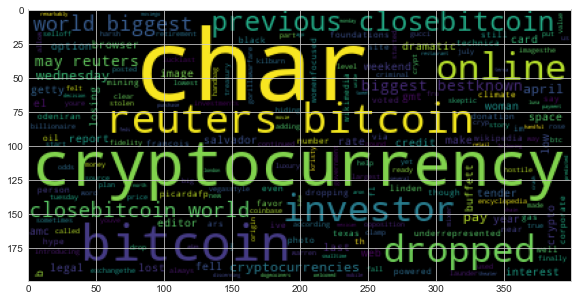

In [59]:
# Generate the Bitcoin word cloud
btc_text = ' '.join(processed_btc)
wc = WordCloud().generate(btc_text)
plt.imshow(wc)


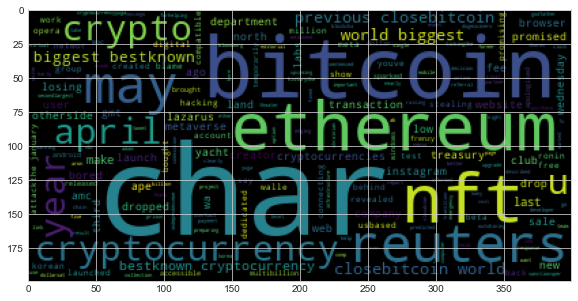

In [60]:
# Generate the Ethereum word cloud
eth_text = ' '.join(processed_eth)
wc = WordCloud().generate(eth_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [62]:
import spacy
from spacy import displacy

In [63]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [64]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [65]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(btc_en_df.text)


In [66]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)

# Add a title to the document
btc_doc.user_data['title'] = 'This is the BTC NER Analysis'

In [67]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [69]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text + ' ' + ent.label_)

Odeniran GPE
Linden GPE
Texas GPE
April 4th DATE
2022 DATE
FRANCOIS PICARD/AFP ORG
Getty Images ORG
Wikipedia ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Warren Buffett PERSON
the weekend DATE
Buffett PERSON
Getty Images ORG
the weekend DATE
34,000 MONEY
27,630 MONEY
Coinbase PERSON
Last week DATE
Fidelity Investments ORG
the US Treasury ORG
April 26 DATE
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
May 4 DATE
Reuters ORG
5.7% PERCENT
39,862.84 MONEY
Wednesday DATE
2,102.94 MONEY
Bitcoin PERSON
20.9% PERCENT
year DATE
Bitcoin PERSON
Gucci PERSON
week DATE
Kristy Kilburn PERSON
May 11 DATE
Reuters ORG
7.23% PERCENT
28,758.29 MONEY
22:05 GMT TIME
Wednesday DATE
2,241.68 MONEY
Bitcoin PERSON
40.4% PERCENT
+361 CARDINAL
last July DATE
33,000 MONEY
the week DATE
last week DATE
Fed ORG
May 9 DATE
Reuters ORG
7.81% PERCENT
31,333.41 MONEY
Monday DATE
2,655.98 MONEY
Bitcoin PERSON
35% PERCENT
AM

---

### Ethereum NER

In [70]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(eth_en_df.text)
eth_text

'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars] Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you\'ve bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars] Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The company released the browser for Windows, Mac and Android users … [+1563 chars] A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars] When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many

In [71]:
# Run the NER processor on all of the text
# Run the NER processor on all of the text
ethereum_doc = nlp(eth_text)

# Add a title to the document
ethereum_doc.user_data['title'] = 'This is the Eth spaCy Analysis'

In [72]:
# Render the visualization
displacy.render(ethereum_doc, style='ent')

In [73]:
# List all Entities
for ent in ethereum_doc.ents:
    print(ent.text + ' ' + ent.label_)

The US Department of Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus ORG
$625 million MONEY
Ronin PERSON
Meta ORG
Instagram ORG
US GPE
Instagram ORG
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
Ethereum ORG
Yuga Labs PERSON
Bored Ape Yacht Club PERSON
Yuga Labs PERSON
Otherside ORG
April 30 DATE
NFT ORG
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
April 26 DATE
Reuters ORG
No.2 DATE
second ORDINAL
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
the "Bored Apes Yacht Club LAW
Last night TIME
Bloomberg PERSON
nearly a third CARDINAL
a billion dollars MONEY
Early this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm PERSON
40 days ago DATE
47,454 MONEY
34,007 MONEY
28%.About a third CARDINAL
this week DATE
first ORDINAL
a year and a half ago DATE
The Order Flow WORK_OF_ART
Dan Robinson PERSON
Georgios Konstantopoulos' ORG
Ethereu

---